# Desafios desta aula

- Tentar vincular dados do IBGE com os dados de imóveis.
- Tratar os outliers e comparar com os resultados.
- Agrupar por mais de uma categoria e realizar as análises.
- Organize o colab para deixar com cara de projeto.

## Importando bibliotecas

In [26]:
import pandas as pd

ibge = 'https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv'
#separa por ;
dados_ibge = pd.read_csv(ibge, sep=";", encoding='UTF-8', decimal=',')
dados_ibge.sample(5)

,Cod_setor,Cod_Grandes Regi�es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
6829,355030836000210,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.03,630.12,888479.08,961.51,1038222.88,547.62,520430.33,935.00,526392.88,NaN
13509,355030870000121,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.12,3074.03,12733505.33,3187.88,12842616.25,2004.04,7942418.90,2654.36,8795464.85,NaN
10651,355030855000182,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,4.00,987.07,877950.44,1085.78,858175.60,584.32,594216.03,947.00,619875.95,NaN
16554,355030887000054,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,4.12,696.17,236653.61,812.20,181372.14,445.84,286999.24,785.62,238572.94,NaN
11707,355030862000029,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.02,4858.24,21659182.05,5285.76,21302543.97,2822.51,13091918.33,3717.22,13918814.88,NaN


### Formatando base de dados

In [27]:
dados_ibge.drop(['Cod_setor', 
                 'Cod_Grandes Regi�es',
                 'Nome_Grande_Regiao',
                 'Cod_UF',
                 'Nome_da_UF ',
                 'Nome_da_micro',
                 'Cod_meso',
                 'Nome_da_meso',
                 'Cod_micro', 
                 'Cod_RM',
                 'Nome_da_RM',
                 'Cod_municipio',
                 'Nome_do_municipio',
                 'Cod_distrito',
                 'Cod_subdistrito', 
                 'Cod_bairro', 
                 'Nome_do_bairro',
                 'Situacao_setor',
                 'Unnamed: 33'],axis=1, inplace=True)

In [28]:
#dados_ibge['Nome_Grande_Regiao'] = dados_ibge['Nome_Grande_Regiao'].str.replace('�', 'a')
dados_ibge.replace('�', 'A', regex=True, inplace=True)

In [29]:
#Testando se existem variaiveis igual para tira-las
#dados_ibge['Nome_do_municipio'].unique()
#dados_ibge['Nome_da_RM'].unique()
#dados_ibge['Nome_da_meso'].unique()
#dados_ibge['Nome_Grande_Regiao'].unique()
#dados_ibge['Nome_do_bairro'].unique()
#dados_ibge['Situacao_setor'].unique() - nao servem para nossa analise

In [30]:
dados_ibge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nome_do_distrito     18363 non-null  object 
 1   Nome_do_subdistrito  18363 non-null  object 
 2   Tipo_setor           18363 non-null  int64  
 3   V001                 18333 non-null  float64
 4   V002                 18333 non-null  float64
 5   V003                 18333 non-null  float64
 6   V004                 18333 non-null  float64
 7   V005                 18333 non-null  float64
 8   V006                 18333 non-null  float64
 9   V007                 18324 non-null  float64
 10  V008                 18324 non-null  float64
 11  V009                 18363 non-null  float64
 12  V010                 18363 non-null  float64
 13  V011                 18352 non-null  float64
 14  V012                 18352 non-null  float64
dtypes: float64(12), int64(1), object(2)


In [31]:
dados_ibge.drop(['V001', 'V002','V003','V004'], axis=1, inplace=True)
dados_ibge.columns

Index(['Nome_do_distrito', 'Nome_do_subdistrito', 'Tipo_setor', 'V005', 'V006',
       'V007', 'V008', 'V009', 'V010', 'V011', 'V012'],
      dtype='object')

In [32]:
dados_ibge.sample(10)

,Nome_do_distrito,Nome_do_subdistrito,Tipo_setor,V005,V006,V007,V008,V009,V010,V011,V012
1238,BRASILANDIA,BRASILANDIA,0,685.04,666826.90,1336.39,426456.78,486.18,469517.40,1166.09,332261.87
12421,RAPOSO TAVARES,RAPOSO TAVARES,0,758.41,621947.16,1072.24,542118.41,464.28,424241.26,941.98,410706.42
4932,FREGUESIA DO A,FREGUESIA DO A,0,1055.98,532801.95,1153.59,468912.40,682.79,513184.80,1013.17,426415.26
6596,ITAIM BIBI,ITAIM BIBI,0,2094.91,2973294.77,2313.13,2776880.38,1658.46,2463460.64,1984.56,2300223.28
1789,CAMPO BELO,CAMPO BELO,0,2567.61,9323099.34,3102.53,9607502.69,2039.07,6710374.61,2735.90,7098200.18
5395,GRAJAA,GRAJAA,1,645.03,308691.93,886.91,209031.42,371.79,219644.63,781.58,141105.34
2554,CANGAIBA,CANGAIBA,0,917.51,833869.84,1317.06,669435.78,660.89,724099.94,1138.69,703465.90
10789,PARQUE DO CARMO,PARQUE DO CARMO,0,947.44,1094807.49,1405.19,979885.33,642.97,860198.45,1275.46,899759.88
9994,LIMAO,LIMAO,0,1092.82,1117478.54,1372.79,1018606.17,878.45,874301.59,1260.66,772512.04
16136,VILA CURUAA,VILA CURUAA,0,1122.16,990091.94,1223.63,955271.83,668.03,674320.29,1027.60,667760.60


## Vamos procurar outliers, plotando gráficos fica visivel os outliers de cada uma das colunms e a partir dessa análise iremos excluí-los

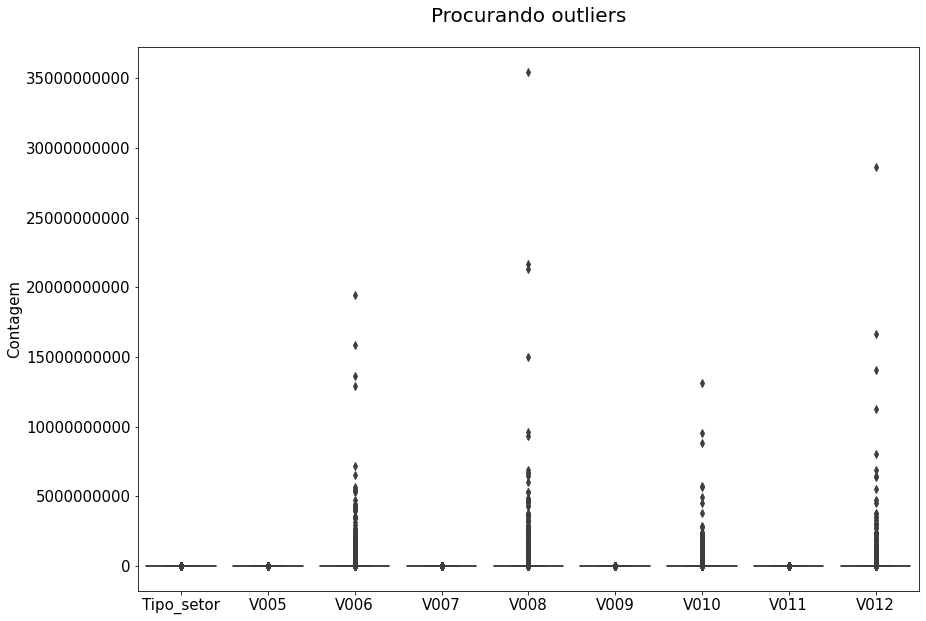

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
#df = dados_ibge['Nome_do_distrito'].value_counts()[:10]
#sns.barplot(df, hue=dados_ibge['Nome_do_distrito'])
plt.figure(figsize=(14,10))
plt.ticklabel_format(style='plain', axis='y')
ax = sns.boxplot(data = dados_ibge)
ax.set_title('Procurando outliers', fontdict={'fontsize':20}, pad=25)
ax.set_ylabel('Contagem', fontdict={'fontsize':15})
ax.tick_params(labelsize=15)

### Definido os outliers que serão excluídos.
- Foram definidos que outliers maiores que 10 bi seriam exluidos, pela razão de existirem muitos outliers e podem interferir na criação do nosso modelo futuro.

In [33]:
_ = dados_ibge.query("V005 < 10000000000 & V006 < 10000000000 & V007 < 10000000000 & V009 < 10000000000 & V010 < 10000000000 & V011 < 10000000000 & V012 < 10000000000")
_

,Nome_do_distrito,Nome_do_subdistrito,Tipo_setor,V005,V006,V007,V008,V009,V010,V011,V012
0,AGUA RASA,AGUA RASA,0,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,AGUA RASA,AGUA RASA,0,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,AGUA RASA,AGUA RASA,0,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,AGUA RASA,AGUA RASA,0,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,AGUA RASA,AGUA RASA,0,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85
...,...,...,...,...,...,...,...,...,...,...,...
18358,LAJEADO,LAJEADO,1,772.09,168751.10,814.52,143188.21,467.46,191332.48,699.95,123399.08
18359,LAJEADO,LAJEADO,1,692.50,239941.27,812.93,182516.20,439.33,194034.99,702.10,124952.38
18360,LAJEADO,LAJEADO,1,630.06,329705.22,843.31,260395.90,347.60,228162.66,767.50,181129.99
18361,LAJEADO,LAJEADO,0,597.37,349101.00,908.00,244391.67,397.76,436942.16,854.20,550319.43


## Gráfico após a exclusão dos maiores outliers

<AxesSubplot:>

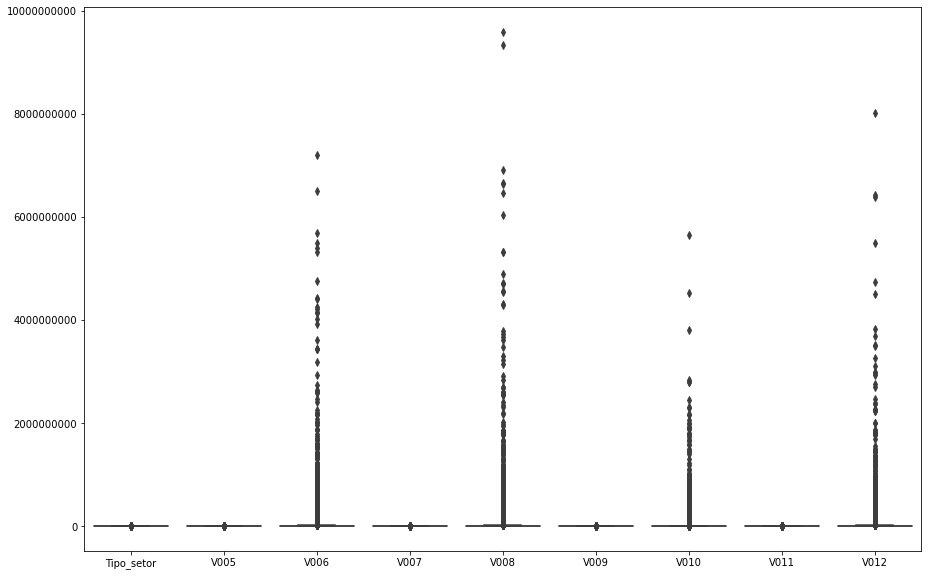

In [34]:
plt.figure(figsize=(15,10))
plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(data = _)

In [35]:
dados_ibge = _
_.head()

,Nome_do_distrito,Nome_do_subdistrito,Tipo_setor,V005,V006,V007,V008,V009,V010,V011,V012
0,AGUA RASA,AGUA RASA,0,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,AGUA RASA,AGUA RASA,0,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,AGUA RASA,AGUA RASA,0,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,AGUA RASA,AGUA RASA,0,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,AGUA RASA,AGUA RASA,0,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


## Agora vamos dá um 'merge' nos dataframes do ibge e dados dos imoveis de sp (que será importado nas próximas células)

- Primeiro vamos encontrar uma relação entre os dois dataframes, que no caso será a coluna 'Bairro', assim sendo possível mesclar ambas.
- Agora iremos mudar a coluna distrito para bairro no dataframe do ibge e renomear algumas outras para facilitar a manipulação

In [36]:
dados_ibge.columns=('Bairro', 'Subdistrito', 'Setor', 'V005', 'V006','V007', 'V008', 'V009', 'V010', 'V011', 'V012')
dados_ibge

,Bairro,Subdistrito,Setor,V005,V006,V007,V008,V009,V010,V011,V012
0,AGUA RASA,AGUA RASA,0,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,AGUA RASA,AGUA RASA,0,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,AGUA RASA,AGUA RASA,0,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,AGUA RASA,AGUA RASA,0,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,AGUA RASA,AGUA RASA,0,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85
...,...,...,...,...,...,...,...,...,...,...,...
18358,LAJEADO,LAJEADO,1,772.09,168751.10,814.52,143188.21,467.46,191332.48,699.95,123399.08
18359,LAJEADO,LAJEADO,1,692.50,239941.27,812.93,182516.20,439.33,194034.99,702.10,124952.38
18360,LAJEADO,LAJEADO,1,630.06,329705.22,843.31,260395.90,347.60,228162.66,767.50,181129.99
18361,LAJEADO,LAJEADO,0,597.37,349101.00,908.00,244391.67,397.76,436942.16,854.20,550319.43


- Para que não ocorra erros de mesclagem, vamos colocar todas as palavras do bairro em minusculo assim como o do proximo df

In [37]:
dados_ibge["Bairro"] = dados_ibge["Bairro"].str.lower().str.strip()

## Importando dataset de imoveis sp (já tratato feito em aulas/desafios passados (as))

In [39]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

'''
Transformando e armazenando a coluna valores
Transformando dados de valores a tipo float
limpeza do df
excluindo algumas colunas
'''

dados[['primeira', 'Novo_valor', 'ultima']] = dados['Valor'].str.split(expand=True)
dados = dados.drop(['primeira', 'ultima'], axis=1)
dados['Novo_valor'] = dados['Novo_valor'].str.replace('.','').astype(float)


dados_ = pd.DataFrame()
dados_ = dados
dados_['Novo_valor_menor_que_1m'] = dados.loc[(dados['Novo_valor'] < 1000000), 'Novo_valor']
dados_['Novo_valor_entre_1m_10m'] = dados.loc[(dados['Novo_valor'] > 1000000) & (dados['Novo_valor'] < 10000000), 'Novo_valor']
dados_['Novo_valor_entre_10m_60m'] = dados.loc[(dados['Novo_valor'] > 10000000) & (dados['Novo_valor'] < 60000000), 'Novo_valor']


dados.sample(5)

/tmp/ipykernel_36617/2291719040.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados['Novo_valor'] = dados['Novo_valor'].str.replace('.','').astype(float)


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Novo_valor,Novo_valor_menor_que_1m,Novo_valor_entre_1m_10m,Novo_valor_entre_10m_60m
6466,NaN,Cidade Jardim,São Paulo,644,4,6,4,R$ 28.000\n /Mês,28000.0,28000.0,NaN,NaN
8007,NaN,Indianópolis,São Paulo,100,3,2,2,R$ 2.500.000,2500000.0,NaN,2500000.0,NaN
9443,"Avenida Albert Einstein, 1009",Jardim Leonor,São Paulo,450,4,5,4,R$ 1.682.000,1682000.0,NaN,1682000.0,NaN
4071,Rua Leandro de Carvalho,Vila Monumento,São Paulo,173,4,5,1,R$ 1.300.000,1300000.0,NaN,1300000.0,NaN
4528,Rua Fonseca Galvão,Jardim da Glória,São Paulo,178,3,2,2,R$ 900.000,900000.0,900000.0,NaN,NaN


In [40]:
dados.columns

Index(['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Valor', 'Novo_valor', 'Novo_valor_menor_que_1m',
       'Novo_valor_entre_1m_10m', 'Novo_valor_entre_10m_60m'],
      dtype='object')

## Procurando outliers muito discrepantes

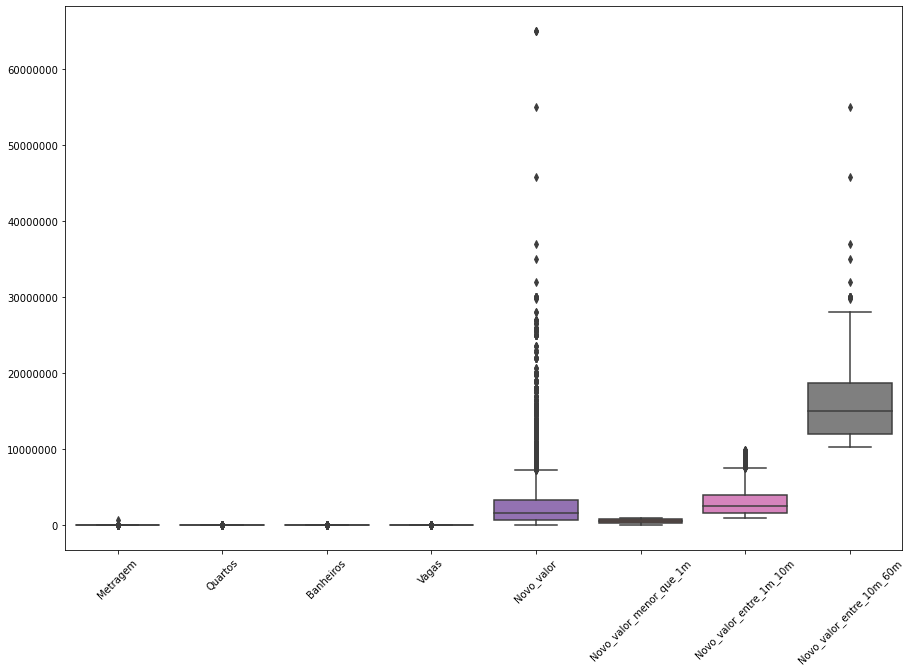

In [41]:
plt.figure(figsize=(15,10))
plt.ticklabel_format(style='plain', axis='y')
ax = sns.boxplot(data=dados)
plt.xticks(rotation=45)
plt.show()

## Valores maiores que 4 m são descartados

In [42]:
dados = dados.query("Novo_valor < 40000000 | Novo_valor_menor_que_1m < 40000000 | Novo_valor_entre_1m_10m < 40000000 | Novo_valor_entre_10m_60m < 40000000")

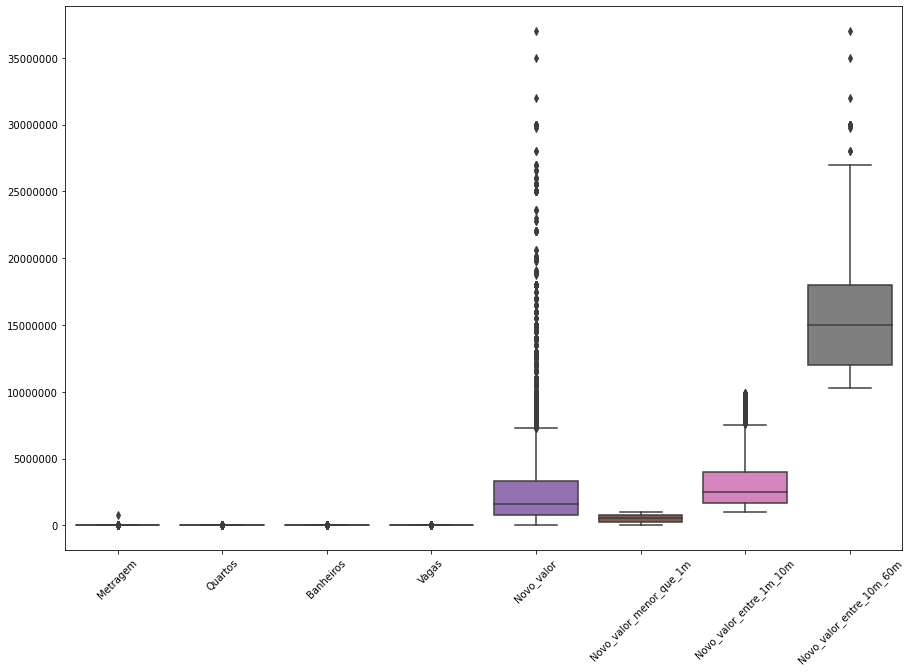

In [43]:
plt.figure(figsize=(15,10))
plt.ticklabel_format(style='plain', axis='y')
ax = sns.boxplot(data=dados)
plt.xticks(rotation=45)
plt.show()

In [44]:
dados["Bairro"] = dados["Bairro"].str.lower().str.strip()

/tmp/ipykernel_36617/1264594761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["Bairro"] = dados["Bairro"].str.lower().str.strip()


## Mesclando os dados de ambos os datasets, através da coluna 'bairro', dropando (excluindo) variáveis duplicadas

In [45]:
merge_dados = pd.merge(left=dados,
                       right=dados_ibge[['Bairro','V005', 'V006','V007', 'V008', 'V009', 'V010', 'V011', 'V012']],
                      on='Bairro').drop_duplicates(subset=dados.columns)
merge_dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Novo_valor,Novo_valor_menor_que_1m,Novo_valor_entre_1m_10m,Novo_valor_entre_10m_60m,V005,V006,V007,V008,V009,V010,V011,V012
0,"Rua Tobias Barreto, 195",mooca,São Paulo,100,3,2,2,R$ 540.000,540000.0,540000.0,NaN,NaN,2197.44,6690242.53,2343.94,6793646.01,1490.0,4602284.67,1893.07,5085711.93
132,Rua Timbó,mooca,São Paulo,170,3,2,2,R$ 940.000,940000.0,940000.0,NaN,NaN,2197.44,6690242.53,2343.94,6793646.01,1490.0,4602284.67,1893.07,5085711.93
264,NaN,mooca,São Paulo,80,2,2,4,R$ 870.000,870000.0,870000.0,NaN,NaN,2197.44,6690242.53,2343.94,6793646.01,1490.0,4602284.67,1893.07,5085711.93
396,Rua Manuel Galvão,mooca,São Paulo,106,3,3,2,R$ 450.000,450000.0,450000.0,NaN,NaN,2197.44,6690242.53,2343.94,6793646.01,1490.0,4602284.67,1893.07,5085711.93
528,"Rua Timbó, 130",mooca,São Paulo,170,3,1,2,R$ 1.000.000,1000000.0,NaN,NaN,NaN,2197.44,6690242.53,2343.94,6793646.01,1490.0,4602284.67,1893.07,5085711.93


## Verificando discrepâncias

<AxesSubplot:>

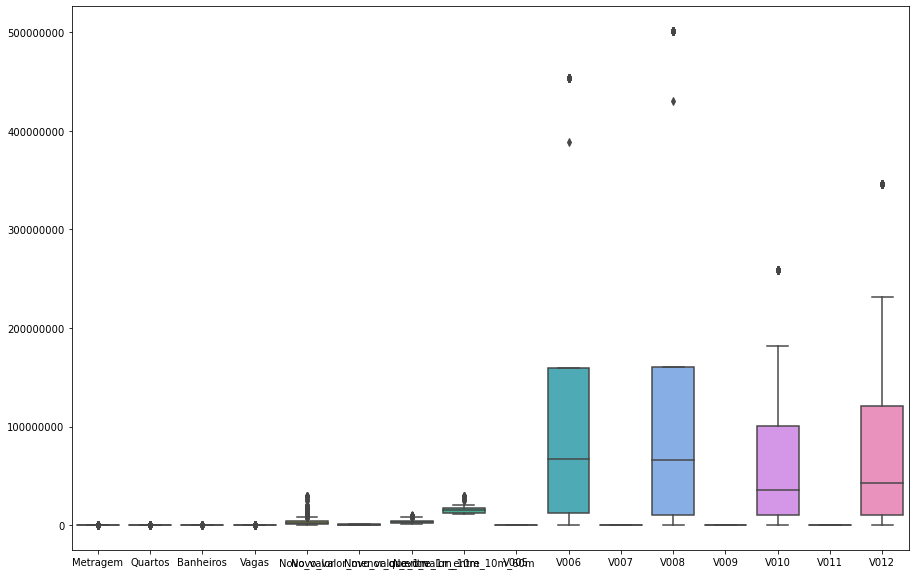

In [21]:
plt.figure(figsize=(15,10))
plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(data=merge_dados)